In [38]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.datasets import MNIST
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

In [39]:
transform = transforms.ToTensor()


trainset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 100, shuffle = True, num_workers = 1)

testset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 100, shuffle = False, num_workers = 1)

In [40]:
testset.targets.size()

torch.Size([10000])

In [41]:
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1,10,5)
    self.conv2 = nn.Conv2d(10, 20, 5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
     x = F.relu(F.max_pool2d(self.conv1(x),2))
     x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
     x = x.view(-1, 320)
     x = F.relu(self.fc1(x))
     x = F.dropout(x, training = self.training)
     x = self.fc2(x)

     return F.softmax(x)

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(trainloader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f'Train epoch: {epoch} [{batch_idx * len(data)}/{len(trainloader.dataset)}({100. * batch_idx / len(trainloader):.0f}%))]')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in testloader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim = 1, keepdim = True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(testloader.dataset)
  print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(testloader.dataset)}({100. * correct / len(testloader.dataset):.0f}%)\n')

In [43]:
for epoch in range(1,11):
  train(epoch)
  test()

/tmp/ipython-input-2760251789.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch: 1 [0/60000(0%))]
Train epoch: 1 [2000/60000(3%))]
Train epoch: 1 [4000/60000(7%))]
Train epoch: 1 [6000/60000(10%))]
Train epoch: 1 [8000/60000(13%))]
Train epoch: 1 [10000/60000(17%))]
Train epoch: 1 [12000/60000(20%))]
Train epoch: 1 [14000/60000(23%))]
Train epoch: 1 [16000/60000(27%))]
Train epoch: 1 [18000/60000(30%))]
Train epoch: 1 [20000/60000(33%))]
Train epoch: 1 [22000/60000(37%))]
Train epoch: 1 [24000/60000(40%))]
Train epoch: 1 [26000/60000(43%))]
Train epoch: 1 [28000/60000(47%))]
Train epoch: 1 [30000/60000(50%))]
Train epoch: 1 [32000/60000(53%))]
Train epoch: 1 [34000/60000(57%))]
Train epoch: 1 [36000/60000(60%))]
Train epoch: 1 [38000/60000(63%))]
Train epoch: 1 [40000/60000(67%))]
Train epoch: 1 [42000/60000(70%))]
Train epoch: 1 [44000/60000(73%))]
Train epoch: 1 [46000/60000(77%))]
Train epoch: 1 [48000/60000(80%))]
Train epoch: 1 [50000/60000(83%))]
Train epoch: 1 [52000/60000(87%))]
Train epoch: 1 [54000/60000(90%))]
Train epoch: 1 [56000/60000(93%

Prediction: 5


/tmp/ipython-input-2760251789.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


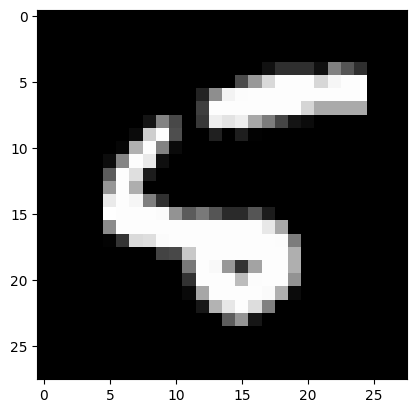

In [54]:
import matplotlib.pyplot as plt
model.eval()
data, target = testset[8]

data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim = 1, keepdim = True)

plt.imshow(data.cpu().squeeze(0).squeeze(0), cmap = 'gray')
print(f'Prediction: {prediction.item()}')